In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir(r'E:\AnalyticsVidhya\Hackathon+DataSet\JanataHack Machine Learning for Banking')

In [3]:
train_data = pd.read_csv('train_fNxu4vz.csv')
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [10]:
train_data.shape

(164309, 13)

In [4]:
#Dropping Loan_ID from dataset!
train_data.drop(['Loan_ID'],axis =1, inplace = True)

In [5]:
#Find Unique Values in Dataset!
train_data.apply(lambda x : len(x.unique()))

Loan_Amount_Requested       1290
Length_Employed               12
Home_Owner                     6
Annual_Income              12306
Income_Verified                3
Purpose_Of_Loan               14
Debt_To_Income              3953
Inquiries_Last_6Mo             9
Months_Since_Deliquency      123
Number_Open_Accounts          58
Total_Accounts               100
Gender                         2
Interest_Rate                  3
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  object 
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 16.3+ MB


In [34]:
#train_data.columns
#Converting Columns to Lower Value
train_data.columns = map(str.lower, train_data.columns)
train_data.columns
#Converting Columns to Captialize Value
#train_data.columns = map(str.capitalize, train_data.columns)
#train_data.columns
#train_data.columns = map(str.upper, train_data.columns)

Index(['loan_amount_requested', 'length_employed', 'home_owner',
       'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income',
       'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts',
       'total_accounts', 'gender', 'interest_rate'],
      dtype='object')

In [35]:
#Missing_Values with DTypes
df1=train_data.isnull().sum().to_frame().rename(columns= {0 : 'Train_Null_Values'})
df3= train_data.dtypes.to_frame().rename(columns= {0 : 'DTypes'})
df = pd.concat([df1, df3],axis =1)

In [36]:
df

,Train_Null_Values,DTypes
loan_amount_requested,0,object
length_employed,7371,object
home_owner,25349,object
annual_income,25102,float64
income_verified,0,object
purpose_of_loan,0,object
debt_to_income,0,float64
inquiries_last_6mo,0,int64
months_since_deliquency,88379,float64
number_open_accounts,0,int64


In [108]:
train_data['length_employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [118]:
train_data['length_employed'] = train_data['length_employed'].str.replace('+', ' ')
train_data['length_employed'] = train_data['length_employed'].str.replace('year ', ' ')
train_data['length_employed'] = train_data['length_employed'].str.replace('years ', ' ')
train_data['length_employed'] = train_data['length_employed'].str.replace('< ', ' ')

In [123]:
train_data['length_employed'].fillna(0, inplace = True)

In [124]:
train_data['home_owner'].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [125]:
dict_home_owner = {'Rent' :0, 'Mortgage':1, 'Own':2, 'Other': 3, 'None':4}
train_data['home_owner']=train_data['home_owner'].map(dict_home_owner)

In [126]:
train_data['home_owner'].fillna(3, inplace = True)

In [142]:
train_data['annual_income'].fillna(1000,inplace = True)

In [144]:
train_data.drop(['months_since_deliquency'], axis =1, inplace = True)

In [154]:
train_data['annual_income'].value_counts().head(100)

60000.0     5462
50000.0     4783
65000.0     4012
40000.0     3856
70000.0     3667
            ... 
170000.0     271
91000.0      261
106000.0     258
250000.0     257
23000.0      251
Name: annual_income, Length: 100, dtype: int64

In [155]:
def annual(x):
    if x <=30000:
        return 'Low'
    elif (x>30000 and x<60000):
        return 'Avergae'
    elif (x>60000 and 90000):
        return 'High'
    else:
        return 'VeryHigh'
    

In [157]:
train_data['annual_income'] = train_data['annual_income'].apply(annual)

In [159]:
train_data.fillna('NotAvailable', inplace = True)

In [177]:
train_data['annual_income'] = train_data['annual_income'].map({'VeryHigh':5,'High':4,'Avergae':3,'Low':2,'NotAvailable':1})

In [ ]:
train_data['income_verified'] = train_data['income_verified'].map({'Female':0,'Male':1})

In [171]:
train_data['gender'] = train_data['gender'].map({'Female':0,'Male':1})

In [169]:
train_data['purpose_of_loan']=train_data['purpose_of_loan'].map({'debt_consolidation':1, 'credit_card':2,
                                                           'home_improvement':3, 'other':4,
                                                           'major_purchase':5, 'small_business':6,
                                                           'car':7, 'medical':8, 
                                                           'moving':9, 'vacation':10,
                                                           'wedding':11, 'house':12,
                                                           'renewable_energy':13, 'educational':14})

In [170]:
train_data=pd.get_dummies(train_data, columns=['home_owner', 'income_verified'], drop_first=True)

In [185]:
train_data.head()

,loan_amount_requested,length_employed,annual_income,purpose_of_loan,debt_to_income,inquiries_last_6mo,number_open_accounts,total_accounts,gender,interest_rate,home_owner_1.0,home_owner_2.0,home_owner_3.0,home_owner_4.0,income_verified_VERIFIED - income source,income_verified_not verified,number_invalid_acc
0,7000,1,4,7,18.37,0,9,14,0,1,0,0,0,0,0,1,5
1,30000,4,1,1,14.93,0,12,24,0,3,1,0,0,0,0,0,12
2,24725,7,4,1,15.88,0,12,16,1,3,1,0,0,0,1,0,4
3,16000,1,3,1,14.34,3,16,22,1,3,0,0,1,0,1,0,6
4,17000,8,4,1,22.17,1,19,30,0,1,0,1,0,0,1,0,11


In [182]:
#train_data.drop(['["Number_Years_To_Repay_Debt"] = train_data["loan_amount_requested"]/train_data["annual_income"]
train_data.drop(['Number_Years_To_Repay_Debt'], axis=1, inplace = True)

In [184]:
train_data["number_invalid_acc"] = train_data["total_accounts"] - train_data["number_open_accounts"]

In [27]:
train_data['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

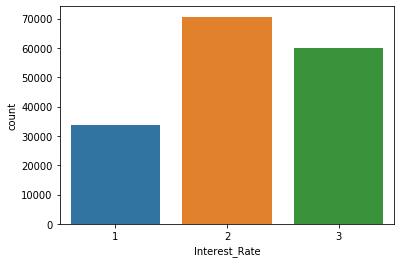

In [28]:
sns.countplot(train_data['Interest_Rate'])

In [37]:
train_data.columns

Index(['loan_amount_requested', 'length_employed', 'home_owner',
       'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income',
       'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts',
       'total_accounts', 'gender', 'interest_rate'],
      dtype='object')

In [42]:
train_data['annual_income'].max()  #4000.0 is min   #max is 7500000

7500000.0

In [ ]:
cat_col = train_data.select_dtypes(include='object').columns.to_list()
cat_col

In [97]:
train_data.columns

Index(['loan_amount_requested', 'length_employed', 'home_owner',
       'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income',
       'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts',
       'total_accounts', 'gender', 'interest_rate'],
      dtype='object')

In [107]:
train_data['interest_rate'].value_counts() #map->income_verified,home_owner,purpose_of_loan,gender

2    70580
3    59923
1    33806
Name: interest_rate, dtype: int64

In [91]:
train_data.groupby('length_employed')['loan_amount_requested'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
length_employed,,,,,,
1 year,10422,725,35000,13242.355114,11500.0,7980.595155
10+ years,52915,1000,35000,15800.171974,15000.0,8589.973933
2 years,14620,800,35000,13592.093023,12000.0,8067.727029
3 years,12974,500,35000,13699.460459,12000.0,8011.624766
4 years,9784,900,35000,13733.130621,12000.0,7972.669287
5 years,10814,1000,35000,13850.906233,12000.0,8043.100489
6 years,9094,1000,35000,14103.216406,12000.0,8004.244626
7 years,9308,1000,35000,14439.637946,12762.5,8068.943753
8 years,7917,1000,35000,14517.361374,12975.0,8135.982141


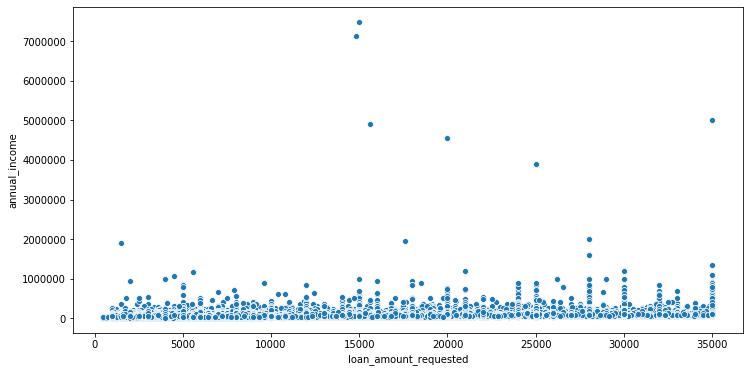

In [94]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='loan_amount_requested',y='annual_income', data= train_data)

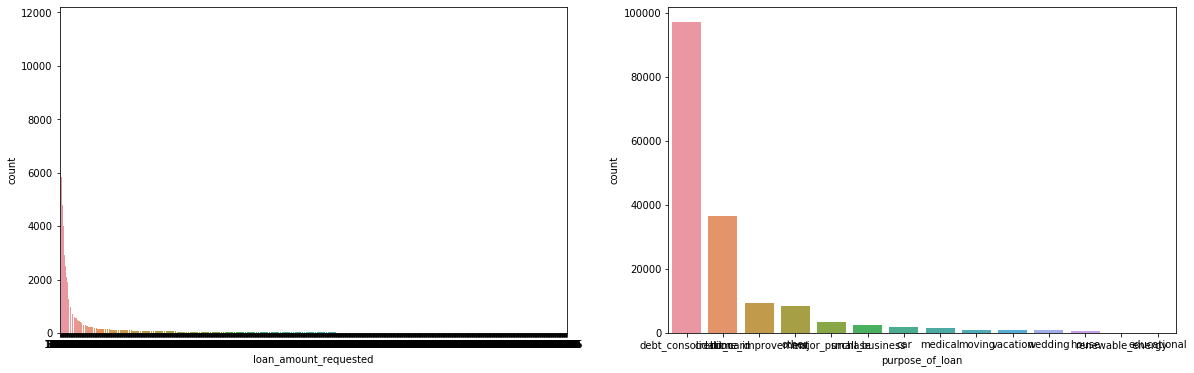

In [90]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(train_data['loan_amount_requested'], order = train_data['loan_amount_requested'].value_counts(dropna=False).index)
plt.subplot(122)
sns.countplot(train_data['purpose_of_loan'], order = train_data['purpose_of_loan'].value_counts(dropna=False).index)

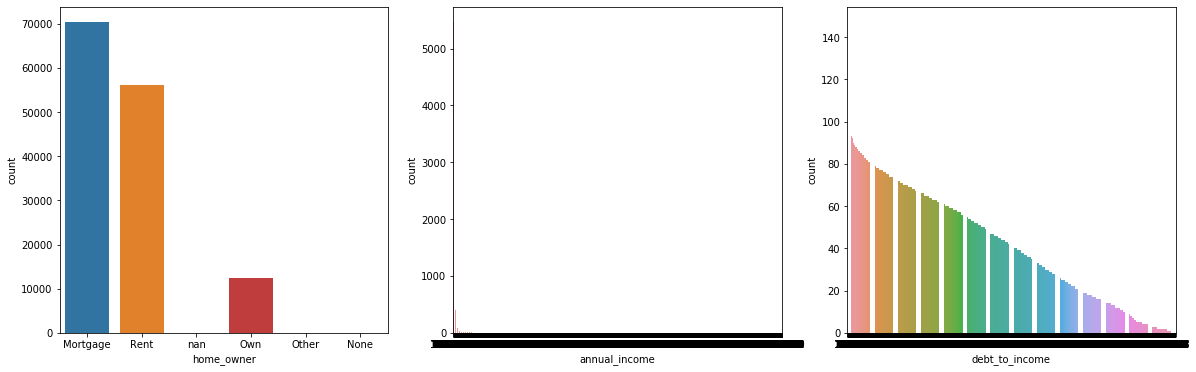

In [38]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.countplot(train_data['home_owner'], order = train_data['home_owner'].value_counts(dropna=False).index)
plt.subplot(132)
sns.countplot(train_data['annual_income'], order = train_data['annual_income'].value_counts(dropna=False).index)
plt.subplot(133)
sns.countplot(train_data['debt_to_income'], order = train_data['debt_to_income'].value_counts(dropna=False).index)

In [198]:
from sklearn.model_selection import train_test_split,cross_validate,RandomizedSearchCV,GridSearchCV,KFold,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [188]:
##Creating independent(X) and dependent(y) variables  
X = train_data.drop('interest_rate',axis=1)
y= train_data['interest_rate']

##split the data for testing and training with 25% test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

##### Bulding Models without scaling

In [189]:
RFC_d = RandomForestClassifier()
RFC_d.fit(X_train,y_train)
pred_ref = RFC_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_ref))
print('f1_score :',f1_score(y_test,pred_ref,average='weighted'))

accuracy_score : 0.49683528896246165
f1_score : 0.4831824624058562


In [190]:
adc_d = AdaBoostClassifier()
adc_d.fit(X_train,y_train)
pred_abc = adc_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_abc))
print('f1_score:',f1_score(y_test,pred_abc,average='weighted'))

accuracy_score : 0.5152393008423
f1_score: 0.4874458951882932


In [191]:
GBC_d = GradientBoostingClassifier()
GBC_d.fit(X_train,y_train)
pred_gbc = GBC_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_gbc))
print('f1_score',f1_score(y_test,pred_gbc,average='weighted'))

accuracy_score : 0.5220069136764205
f1_score 0.4933196713830373


In [207]:
#StandardScaler 
scale_std = StandardScaler()
X_train_std = scale_std.fit_transform(X_train)
X_test_std = scale_std.transform(X_test)

In [208]:
RFC_std = RandomForestClassifier()
RFC_std.fit(X_train_std,y_train)
pred_rfcstd = RFC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_rfcstd))
print('f1_score:',f1_score(y_test,pred_rfcstd,average='weighted'))

accuracy_score : 0.4971274161351575
f1_score: 0.4836464491212075


In [209]:
ABC_std = AdaBoostClassifier()
ABC_std.fit(X_train_std,y_train)
pred_abcstd = ABC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_abcstd))
print('f1_score :',f1_score(y_test,pred_abcstd,average='weighted'))

accuracy_score : 0.5152393008423
f1_score : 0.4874458951882932


In [210]:
GBC_std = GradientBoostingClassifier()
GBC_std.fit(X_train_std,y_train)
pred_gbcstd = GBC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_gbcstd))
print('f1_score :',f1_score(y_test,pred_gbcstd,average='weighted'))

accuracy_score : 0.5220069136764205
f1_score : 0.4933196713830373


# Xb_Boost_Model

In [211]:
import xgboost
clf = xgboost.XGBClassifier()

In [223]:
train_data['length_employed'].unique()

array([' 1 ', '4 ', '7 ', '8 ', '2 ', '10  ', '1 ', 0, '6 ', '9 ', '3 ',
       '5 '], dtype=object)

In [224]:
train_data['length_employed'] = pd.to_numeric(train_data['length_employed'])

In [227]:
train_data['length_employed'].dtypes

dtype('int64')

In [230]:
##Creating independent(X) and dependent(y) variables  
X = train_data.drop('interest_rate',axis=1)
y= train_data['interest_rate']


In [231]:
##split the data for testing and training with 25% test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [232]:
clf.fit(X_train,y_train)
pred_xgd = clf.predict(X_test)

print('accuracy_score :',accuracy_score(y_test,pred_xgd))
print('f1_score :',f1_score(y_test,pred_xgd,average='weighted'))

accuracy_score : 0.5259993183699304
f1_score : 0.509202119549376


#### KFold Crossvalidation 

In [240]:
kf  = KFold(n_splits=10)
scores = []
pred_test = []
model = xgboost.XGBClassifier()
i=1
for train_index ,test_index in kf.split(X):
    #print('Train index:',train_index,'Cross_validation index:',test_index)
    X_train_cv = X.iloc[train_index]
    X_test_cv = X.iloc[test_index]
    
    y_train_cv = y.iloc[train_index]
    y_test_cv = y.iloc[test_index]
    
    model.fit(X_train_cv,y_train_cv)
    
    pred = model.predict(X_test_cv)
    
    print('validation data f1_score after {} split'.format(i),f1_score(y_test_cv,pred,average='weighted'))
    i +=1
    scores.append(f1_score(y_test_cv,pred,average='weighted'))
    test_predictions = model.predict(X_test)
    pred_test.append(test_predictions)
    

validation data f1_score after 1 split 0.5085293252547051
validation data f1_score after 2 split 0.5087627613972161
validation data f1_score after 3 split 0.5111036919760514
validation data f1_score after 4 split 0.5071589806913487
validation data f1_score after 5 split 0.5145257250453188
validation data f1_score after 6 split 0.5099916099060675
validation data f1_score after 7 split 0.511521088075899
validation data f1_score after 8 split 0.5164857131148958
validation data f1_score after 9 split 0.5099920201972179
validation data f1_score after 10 split 0.514803481400603


In [235]:
scores

[0.5085293252547051,
 0.5087627613972161,
 0.5111036919760514,
 0.5071589806913487,
 0.5145257250453188,
 0.5099916099060675,
 0.511521088075899,
 0.5164857131148958,
 0.5099920201972179,
 0.514803481400603]

In [ ]:
pred_test

In [237]:
## making combining of  of all the models out put 
from scipy.stats import mode
pred1 = mode(pred_test,0)

In [238]:
dataframe = pd.DataFrame({'Loan_ID':ID,'Interest_Rate':pred1.mode[0]})

NameError: name 'ID' is not defined